---

# CSCI 3202, Fall 2023
# Homework 4.2
# Total: 50 pts
# Due: 1st November at 11:59 pm

<br> 

### Your name: Owen Kutzscher

<br> 

#### Setting up aima-python repo
* Follow the steps outlined in the README file here
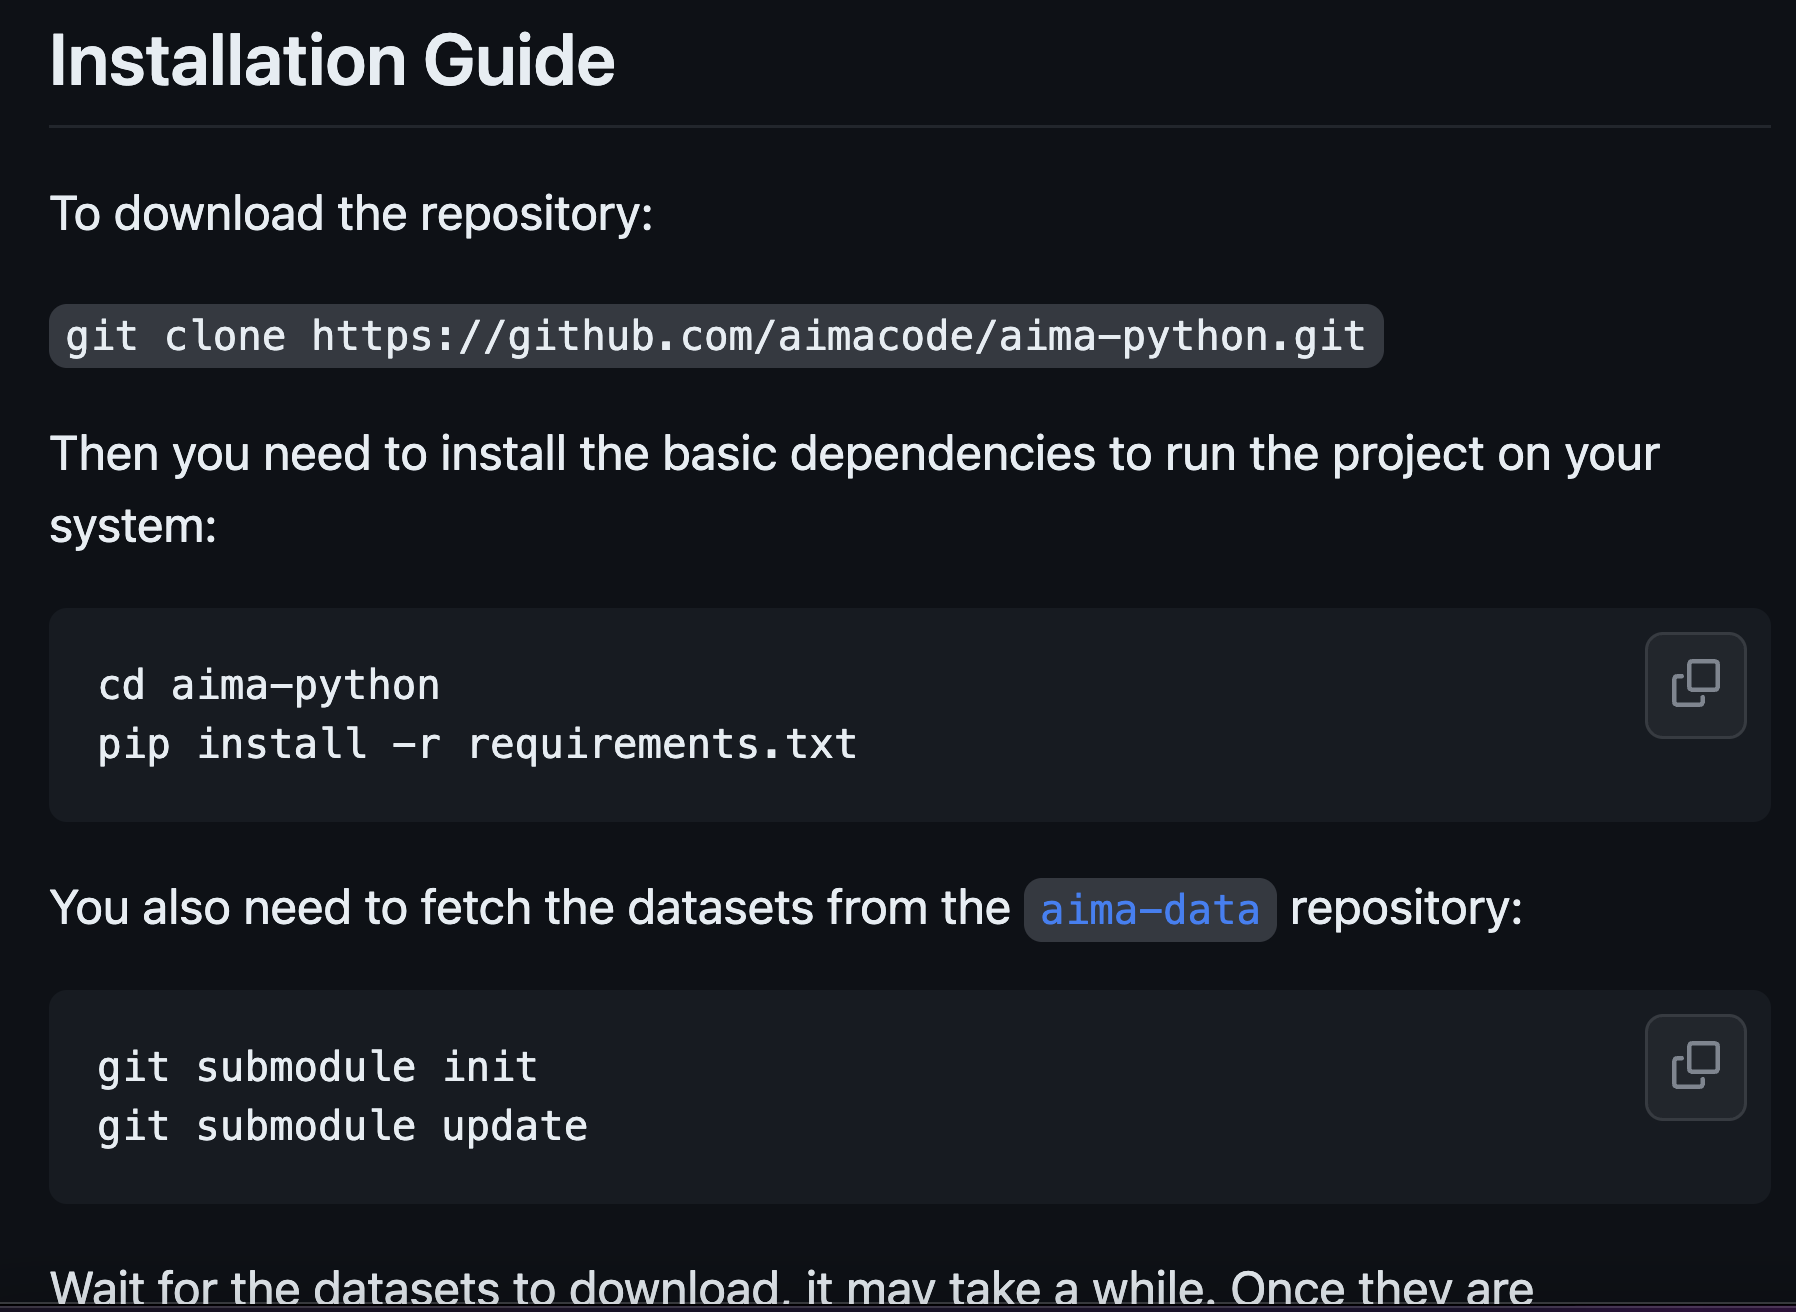

In [1]:
from probability import *
from utils import print_table
from notebook import psource, pseudocode, heatmap

In this homework, we will be working with Bayes Nets. We will solve a Bayesian network problem, initially on paper and then using [probability](https://github.com/aimacode/aima-python/blob/master/probability.py) module from [aima-python](https://github.com/aimacode/aima-python) repository.

### Problem 1: Write the equations in LateX and then solve through code

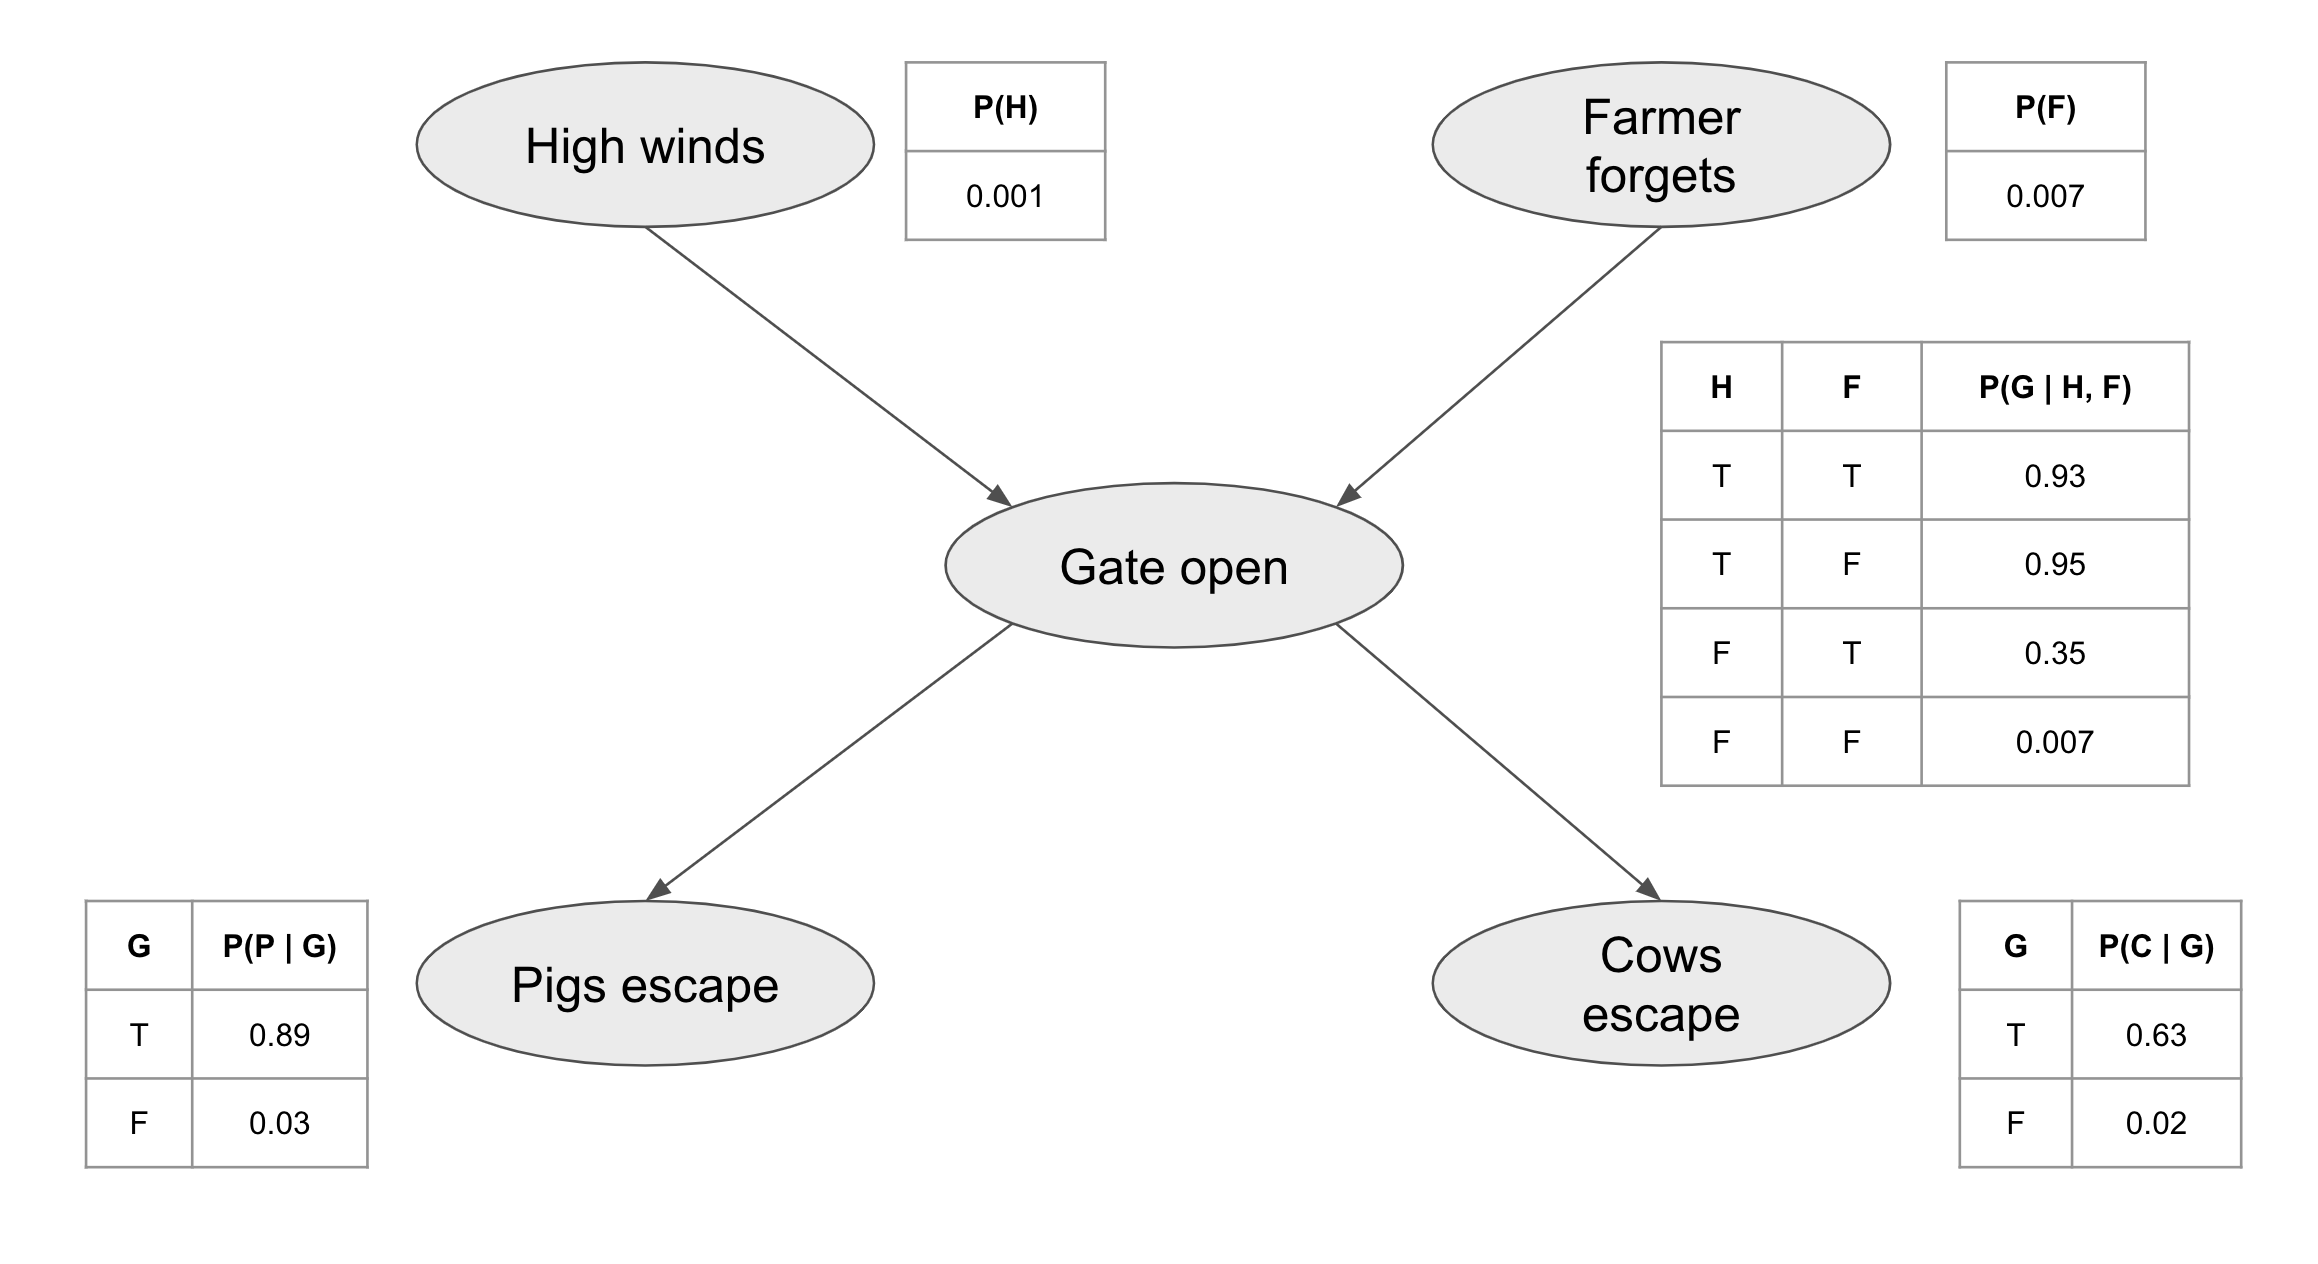

#### If the above diagram, isn't showing up for you in the notebook, please refer to bayes_net_4_2_2.png

The above given problem is a Bayesian network, where we have two nodes with no parents - _high winds_ and _farmer forgets_ to close the gate. We have one node with two parents - _gate open_ which leads to two children. The two children are _pigs escape_ and _cows escape_. Now, given this network, solve the questions below as specified.

You may refer to the [probability module](https://github.com/aimacode/aima-python/blob/master/probability.py) and the [probability notebook](https://github.com/aimacode/aima-python/blob/master/probability.ipynb) (with more explanations) in the aima-python repository.

### Questions:
Understand the problem, write the mathematical equations to solve the problem using LateX ( an example given below) and finally solve the problem using the code (_enumeration_ask_ method)

In [2]:
psource(enumeration_ask)

Example 1: Probability that the gate is open?

The mathematical equation to solve this problem would be: \
$\sum_{h} \sum_{f} P(G | H, F)P(H)P(F)$ \
where, \
h = all values of variable H(High winds) \
f = all values of variable F(Farmer forgets)

BayesNet can be initialised by passing it a list of tuples of the form - (X, parents of X, cpt table) \
where X is the node name, \
parents of X must be either in a space separated string or a list of strings \
cpt table is the table provided in the diagram above for each node

Nodes must be ordered with parents before children. \
Please make note that if you have whitespaces in the node names, the BayesNet functions wont work, so use 'High_winds' rather than 'High winds' as node names

Construct your BayesNet in the below cell

In [3]:
T, F = True, False

# Write your code here
farmer_john_net = BayesNet([
    ('HighWinds', '', 0.001),
    ('FarmerForgets', '', 0.007),
    ('GateOpen', ['HighWinds', 'FarmerForgets'],
     {(T, T): 0.93, (T, F): 0.95, (F, T): 0.35, (F, F): 0.007}),
    ('PigsEscape', 'GateOpen', {T: 0.89, F: 0.03}),
    ('CowsEscape', 'GateOpen', {T: 0.63, F: 0.02})
])

1.1 Probability that the pigs escape? - **5 pts**

The mathematical equation to solve this problem would be: \
$\sum_{h} \sum_{f} \sum_g P(P|G)P(G | H, F)P(H)P(F)$ \
where, \
h = all values of variable H(High winds) \
f = all values of variable F(Farmer forgets) \
g = all values of variable G(Gate Open) \
p = all values of variable P(Pigs Escape) \
c = all values of variable C(Cows Escape) 

In [4]:
#Write your code here

enumeration_ask('PigsEscape', {}, farmer_john_net)[True]

0.03889365474

1.2 Probability that the farmer did not forget to close the gate given that the cows have escaped? - **5 pts**

Write LateX equation in this cell

The mathematical equation to solve this problem would be: \
$1 - \frac{\sum_h\sum_gP(F)P(H)P(G|F,H)P(C|G)}{\sum_h\sum_f\sum_gP(F)P(H)P(G|F,H)P(C|G)}$
where, \
h = all values of variable H(High winds) \
f = all values of variable F(Farmer forgets) \
g = all values of variable G(Gate Open) \
p = all values of variable P(Pigs Escape) \
c = all values of variable C(Cows Escape)

In [5]:
#Write your code here

enumeration_ask('FarmerForgets', {'CowsEscape': T}, farmer_john_net)[False]

0.9377771569105317

1.3 Probability that neither cows escape nor pigs escape given that High winds is set to True? - **5 pts**

Write LateX equation in this cell

$1-(\frac{\sum_f\sum_g\sum_pP(H)P(F)P(G|H,F)P(C)) * (\sum_f\sum_gP(H)P(F)P(G|H,F)P(P))}{P(H)})$



In [6]:
#Write your code here

enumeration_ask('CowsEscape', {'HighWinds': T}, farmer_john_net)[False] * enumeration_ask('PigsEscape', {'HighWinds': T}, farmer_john_net)[False]

0.06133779668216

### Problem 2 - Solve through code only
(LateX equations not required)

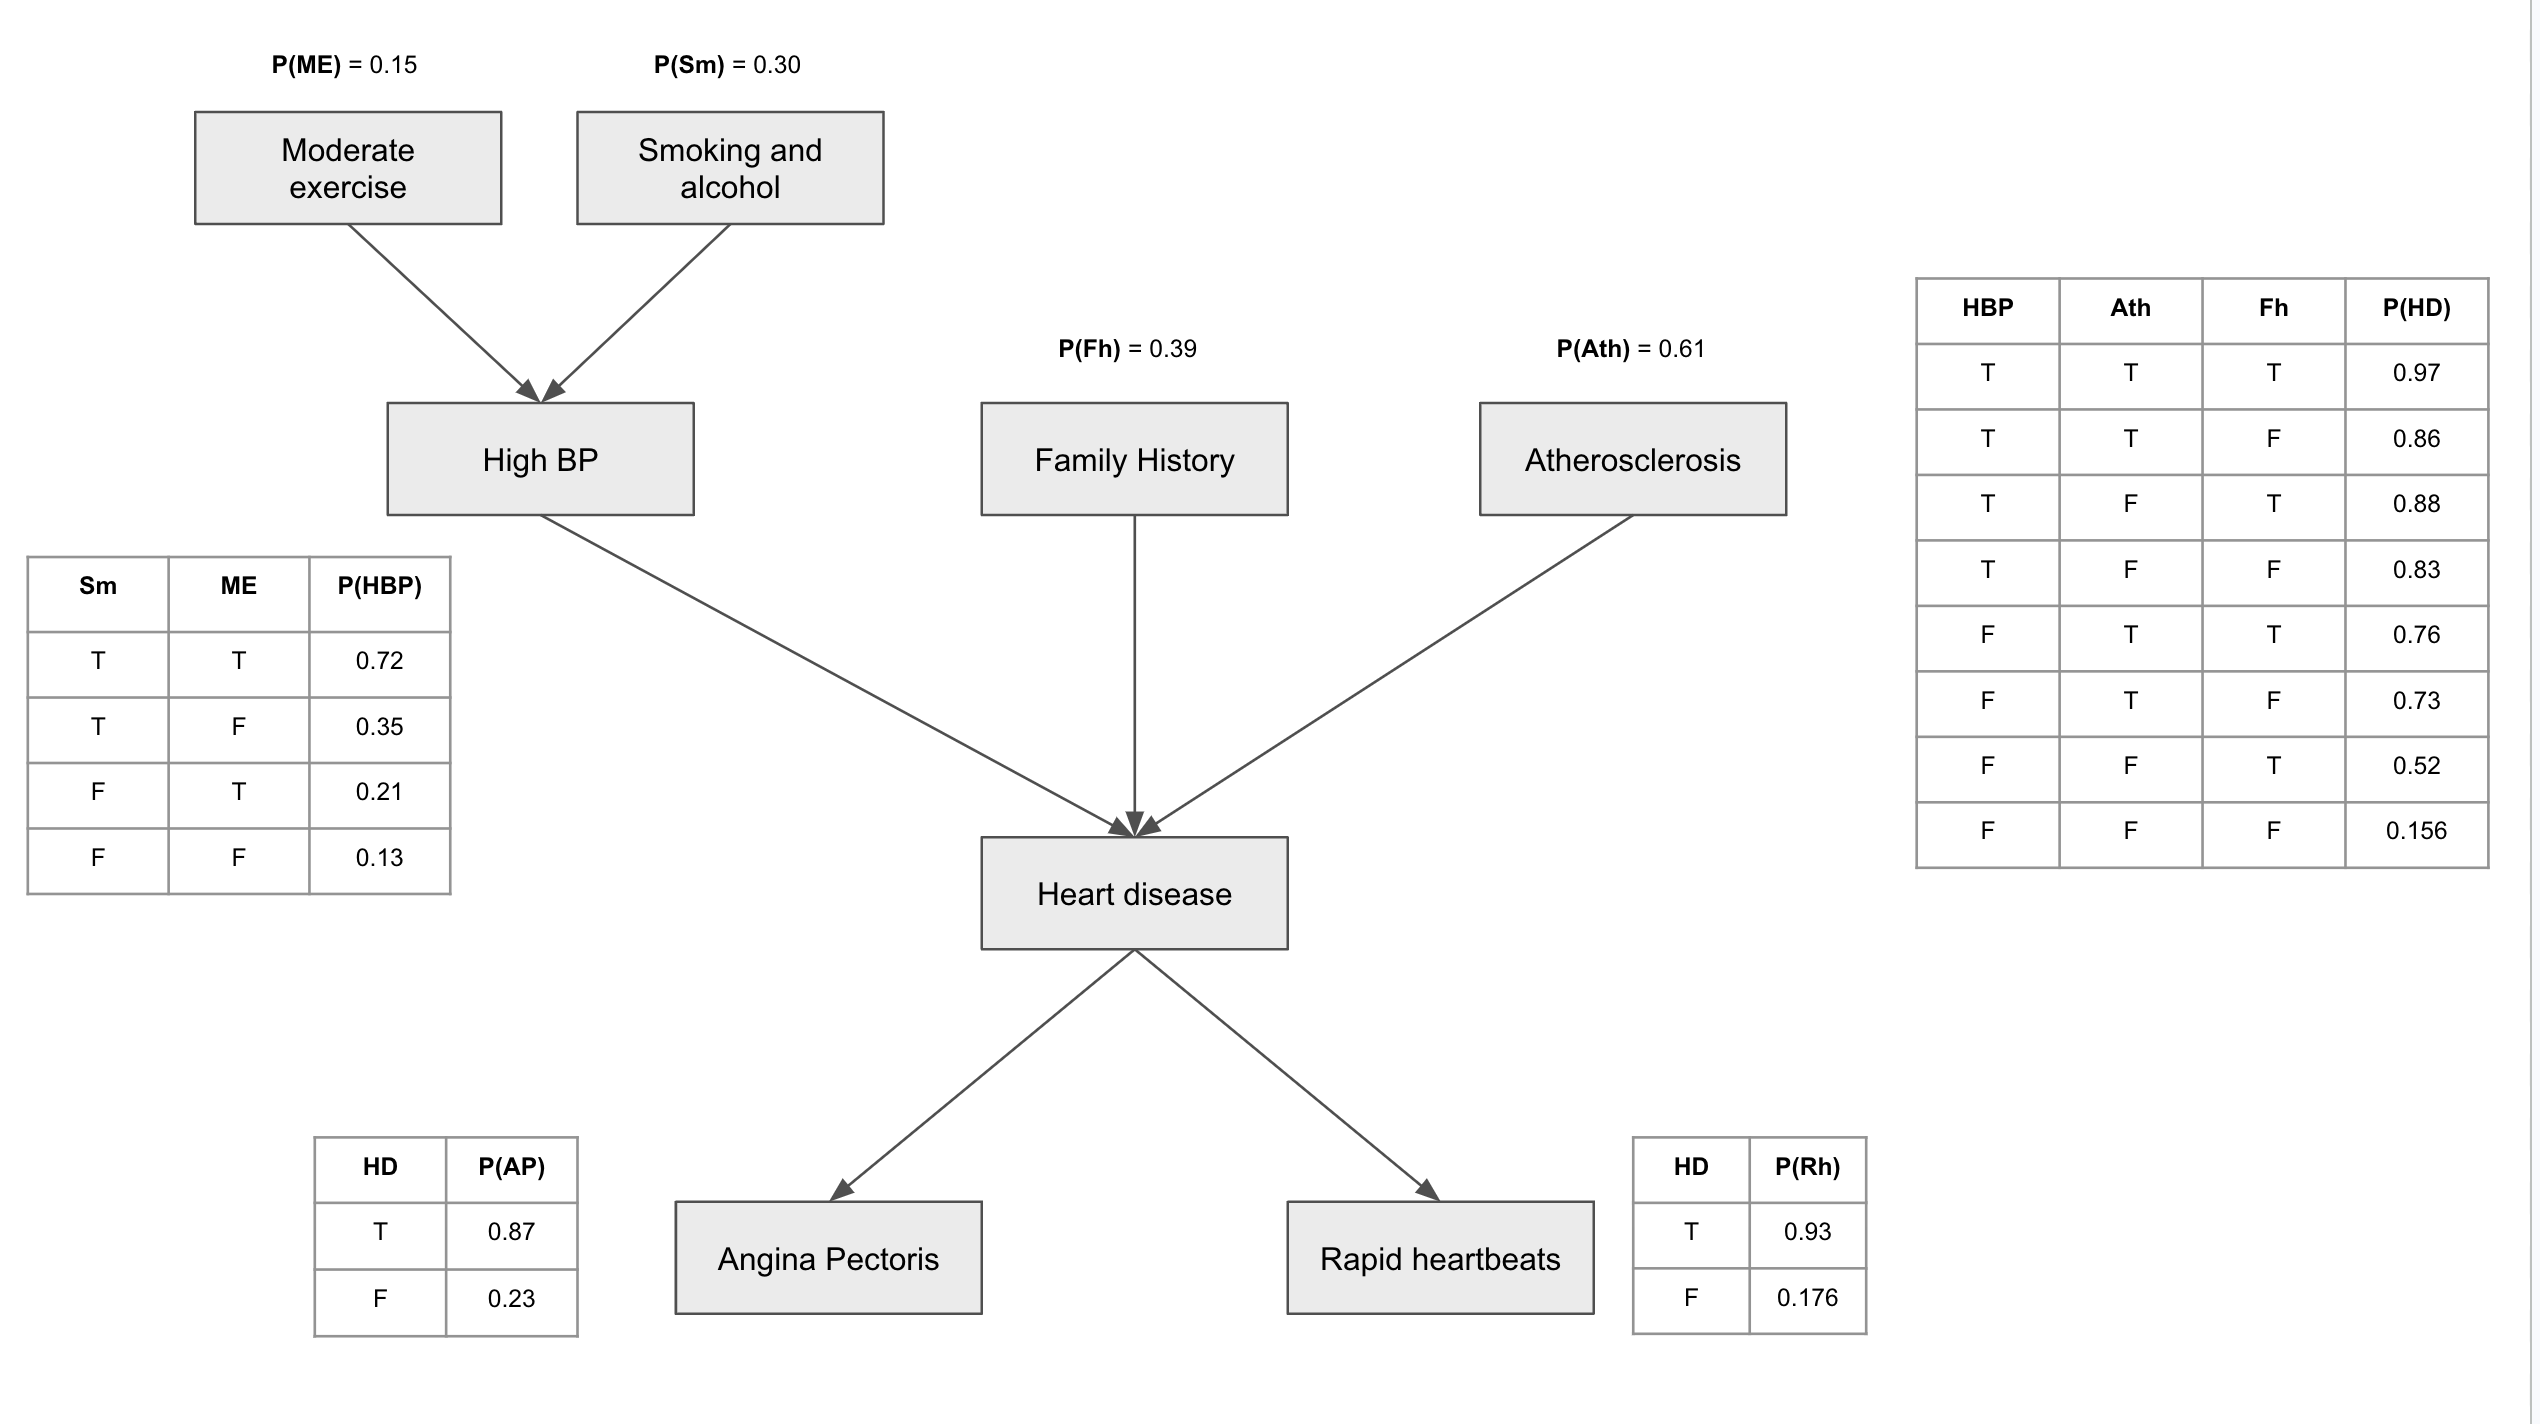

#### If the above diagram, isn't showing up for you in the notebook, please refer to bayes_net_4_2_1.png

For the above diagram, define the Bayes Network in the below cell.

In [76]:
T, F = True, False

# Write your code here

johns_heart_problems = BayesNet([
    ('ME', '', 0.15),
    ('SAA', '', 0.30),  # Corrected spelling from 'Alchohol' to 'Alcohol'
    ('HBP', ['SAA', 'ME'],
     {(T, T): 0.72, (T, F): 0.35, (F, T): 0.21, (F, F): 0.13}),
    ('FH', '', 0.39),
    ('A', '', 0.61),
    ('HD', ['HBP', 'A', 'FH'],
     {(T, T, T): 0.97, (T, T, F): 0.86, (T, F, T): 0.88, (T, F, F): 0.83, (F, T, T): 0.76, (F, T, F): 0.73, (F, F, T): 0.52, (F, F, F): 0.156}),
    ('AP', 'HD', {T: 0.87, F: 0.23}),
    ('RHB', 'HD', {T: 0.93, F: 0.176})
])

2.1 Probability that a person has a heart disease? - **5 pts**

In [77]:
# Write your code here
enumeration_ask('HD', {}, johns_heart_problems)[True]

0.63792567623

2.2 Probability that a person has Angina Pectoris, given he smokes and drinks alcohol and does not have atherosclerosis? - **5 pts**

In [78]:
# Write your code here

enumeration_ask('AP', {'SAA': T, 'A': F}, johns_heart_problems)[True]

0.5638300608

2.3 Probability that a man has Angina Pectoris and not Rapid heartbeats given he has history of heart diseases in his family and exercises moderately? - **5 pts**

In [85]:
#Write your code here
print("this is wrong and idk why")
enumeration_ask('AP', {'FH': T, 'ME': T}, johns_heart_problems)[True] * enumeration_ask('RHB', {'FH': T, 'ME': T}, johns_heart_problems)[False]

this is wrong and idk why


0.17831337838132905

2.4 Probability that a woman has history of heart diseases in her family given that she suffers from Angina Pectoris? - **5 pts**

In [86]:
#Write your code here
enumeration_ask('FH', {'AP': T}, johns_heart_problems)[True]

0.42434494514711496

2.5 Probability that a person has atherosclerosis given that they exercise moderately and suffer from Angina Pectoris? - **5 pts**

In [87]:
#Write your code here
enumeration_ask('A', {'ME': T, 'AP': T}, johns_heart_problems)[True]

0.6789742784173405

2.6 Probability that a man smokes and drinks alcohol given he has rapid heartbeats and no history of heart diseases in his family? - **5 pts**

In [88]:
#Write your code here
print("this is wrong and idk why")
enumeration_ask('SAA', {'RHB': T, 'FH': F}, johns_heart_problems)[True]

this is wrong and idk why


0.32322560282608975

2.7 Probability that a woman doesn't suffer from Angina Pectoris given that she exercises moderately and doesn't drink nor smoke ? - **5 pts**

In [89]:
#Write your code here
enumeration_ask('AP', {'ME': T, 'SAA': F}, johns_heart_problems)[False]

0.36394416256

#### Answers to some questions:

#### Problem 1:
- **1.1** - 0.03889365474
- **1.3** - 0.06133779668216

#### Problem 2:
- **2.1** - 0.63792567623
- **2.3** - 0.17831337838132905
- **2.4** - 0.42434494514711496
- **2.5** - 0.6789742784173405
- **2.6** - 0.32322560282608975